**Context:**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Problem Statement:**

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

**Dataset Description:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


**Approach:**

Following pointers will be helpful to structure your findings.   

1. Perform descriptive analysis. It is very important to understand the variables and corresponding values. Treating '0' values of the attributes below with appropriate techniques:
            •	Glucose
            •	BloodPressure
            •	SkinThickness
            •	Insulin
            •	BMI

2. Visually explore these variable, you may need to look for the distribution of these variables using histograms. 

3. Observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?


In [1]:
# Importing basic libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load and view dataset.

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observations**

   1. There are 768 rows with float and int type data types (8 features with one target/outcome). We have no missing values, however the values must be further investigated for appropriateness.
   2.There are zero NaN values in the dataset.
   3. 1 represents diabetes positive and 0 represents diabetes negative**

In [4]:
# To confirm there are no null values in the dataset.

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Lets split the data into train and test set before EDA.

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [6]:
train_df.shape

(614, 9)

In [7]:
test_df.shape

(154, 9)

In [8]:
# Saving train and test datasets

train_df.to_csv("train_df.csv")
test_df.to_csv("test_df.csv")

##### EDA for train_df

In [9]:
train_df.describe().T.drop("count", axis=1).style.bar(subset=["mean"], color="silver").background_gradient(subset=["std","min"], cmap="YlGnBu").background_gradient(
        subset=["50%"], cmap="YlGnBu")

,mean,std,min,25%,50%,75%,max
Pregnancies,3.742671,3.313264,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,120.855049,32.035057,0.000000,100.000000,117.000000,139.000000,199.000000
BloodPressure,69.415309,18.512599,0.000000,64.000000,72.000000,80.000000,122.000000
SkinThickness,20.399023,15.433974,0.000000,0.000000,23.000000,32.000000,63.000000
Insulin,81.438111,116.234835,0.000000,0.000000,42.500000,129.750000,846.000000
BMI,31.983388,7.740625,0.000000,27.100000,32.000000,36.375000,67.100000
DiabetesPedigreeFunction,0.469168,0.336847,0.078000,0.241500,0.372500,0.613750,2.420000
Age,32.907166,11.503437,21.000000,24.000000,29.000000,40.000000,81.000000
Outcome,0.346906,0.476373,0.000000,0.000000,0.000000,1.000000,1.000000


**From the table above, we can understand that:**
1. There are columns with 0 as the input values such as columns "Pregnancies", "Glucose", "BloodPressure","SkinThickness", "Insulin" and "BMI". 0 values in these columns indicate missing of data and thus must be handled with proper replacement techniques.
2. 17 as max number in pregnancies could indicate a typing error or miscarriages.


In [10]:
# Lets handle the 0 values first. Replace the 0's to NaN

train_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = train_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
train_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106.0,76.0,NaN,NaN,37.5,0.197,26,0
517,7,125.0,86.0,NaN,NaN,37.6,0.304,51,0
599,1,109.0,38.0,18.0,120.0,23.1,0.407,26,0
730,3,130.0,78.0,23.0,79.0,28.4,0.323,34,1
616,6,117.0,96.0,NaN,NaN,28.7,0.157,30,0


In [11]:
missing_values = train_df.isnull().sum()/len(train_df)
print(missing_values[missing_values > 0])

Glucose          0.008143
BloodPressure    0.039088
SkinThickness    0.286645
Insulin          0.472313
BMI              0.011401
dtype: float64


**If there the NaN values account for more than 90 percent,we will can proceed by deleting them off, however, that is not the case with our dataset. So, we will replace the NaNs with appropriate values.**

In [12]:
# Lets visualize the missing/NaN values
import missingno as msno

<AxesSubplot:>

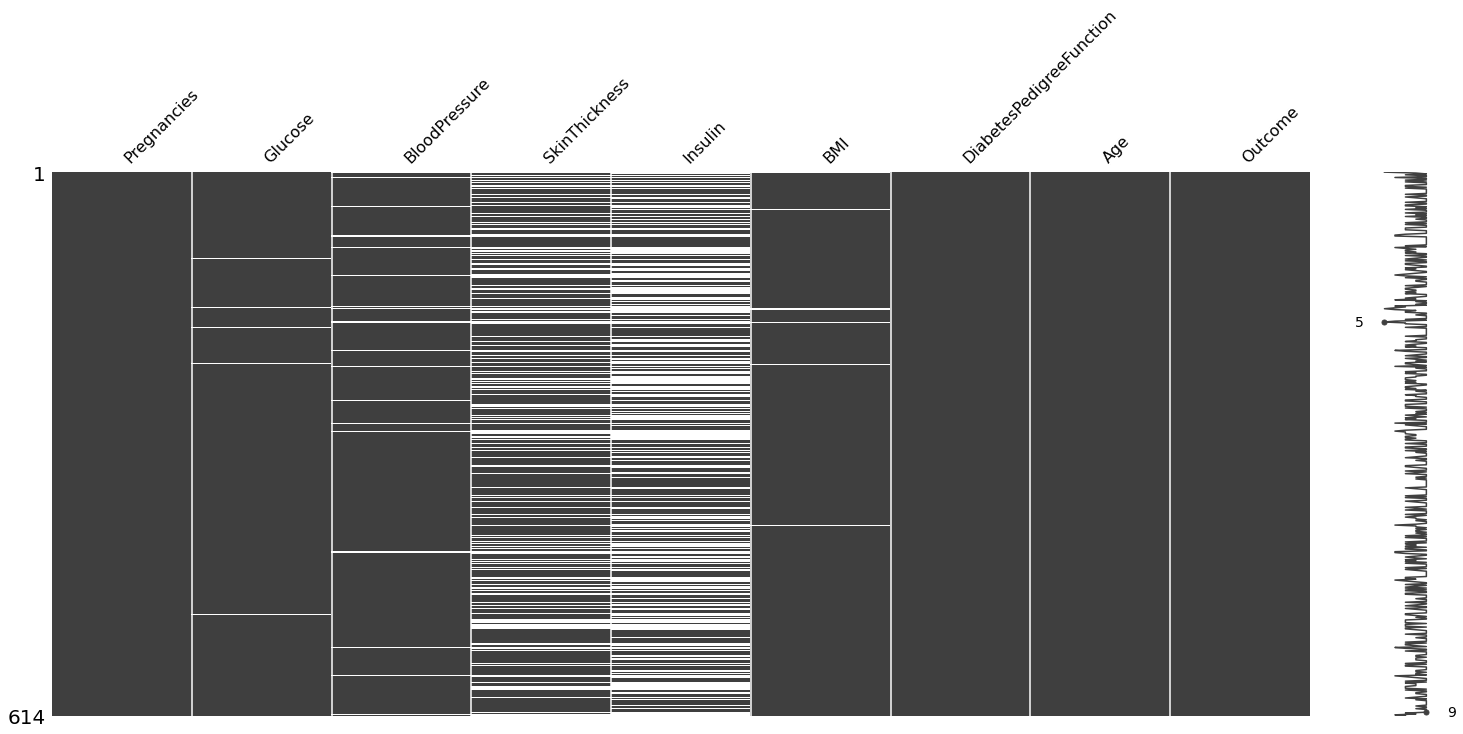

In [13]:
msno.matrix(train_df)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

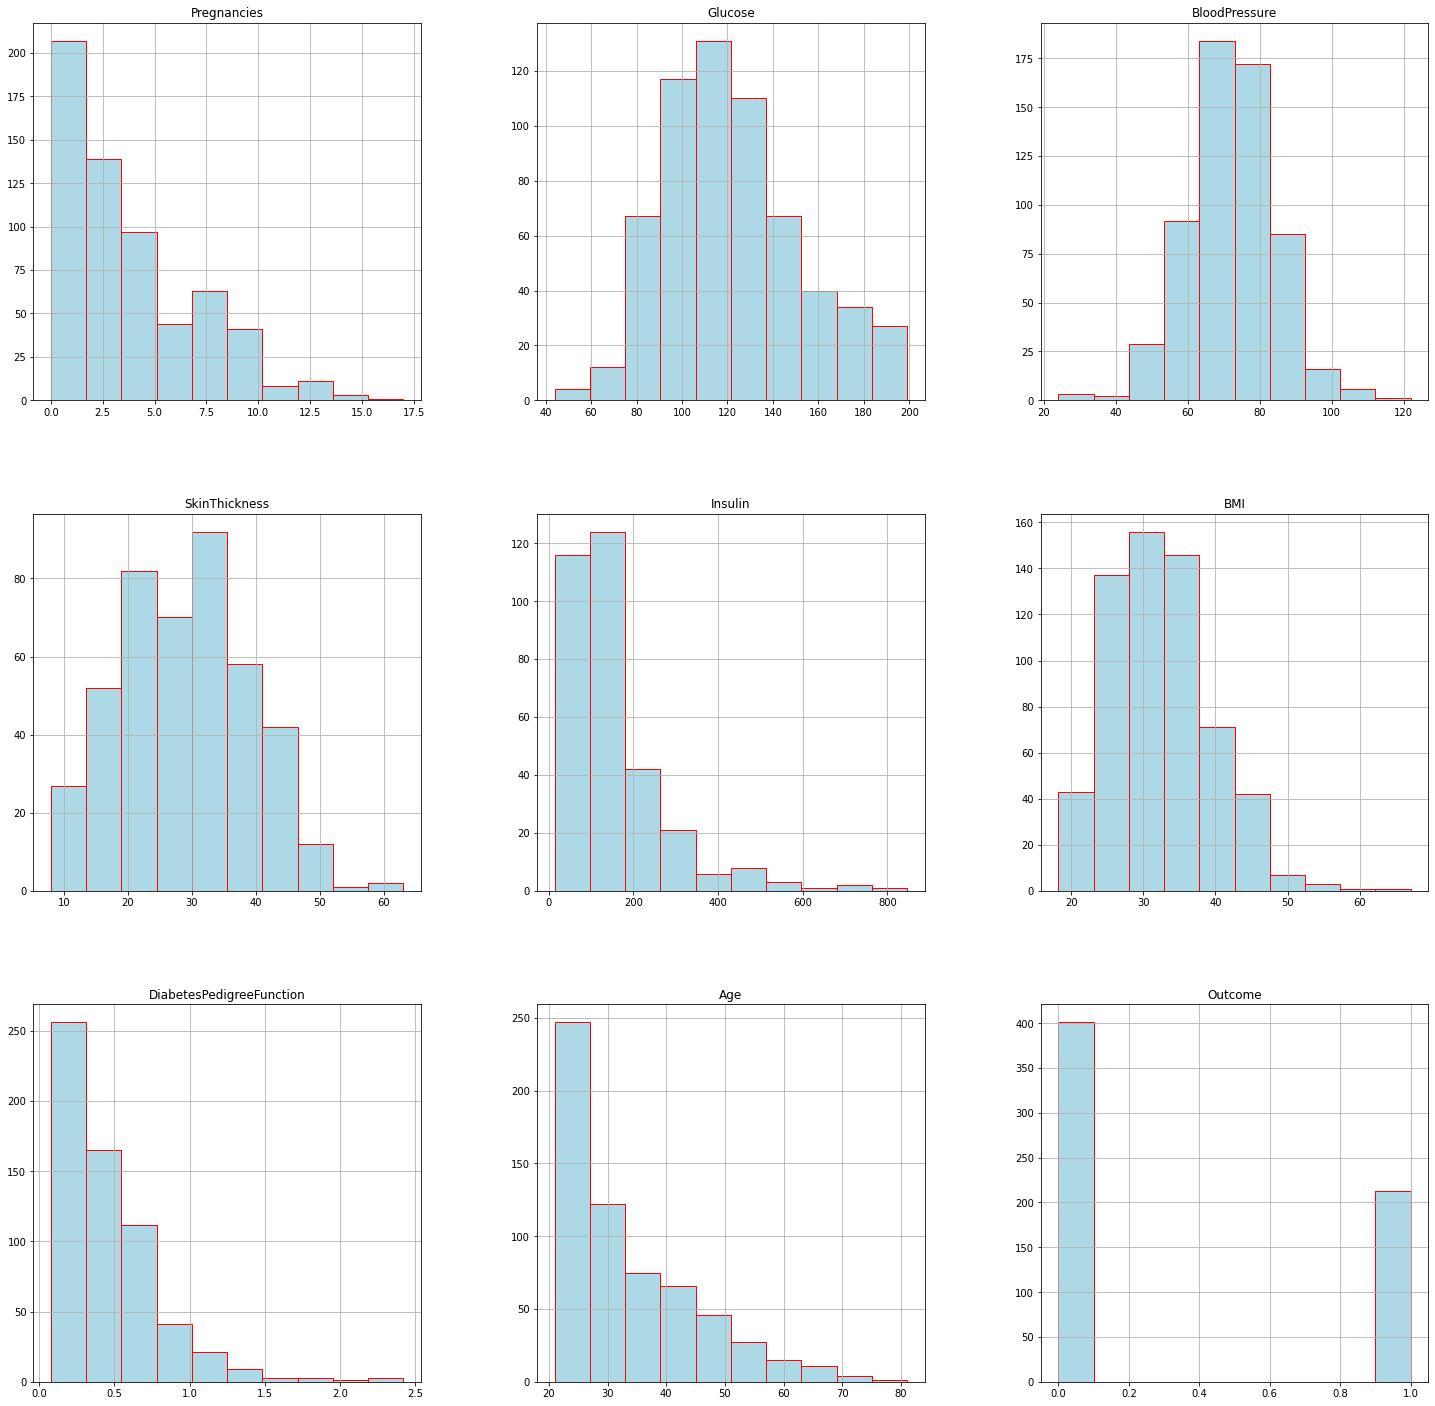

In [14]:
## To visualize data distribution, lets plot some histograms
train_df.hist(figsize=(25,25),color = "lightblue", ec="red")

##### KNNImputer to impute the missing values

In [15]:
# Normalization before imputation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns = train_df.columns)

In [16]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.117647,0.258065,0.508163,0.145455,0.043510,0.150102,0.096499,0.000000,0.0
1,0.529412,0.438710,0.591837,0.290909,0.266106,0.204499,0.514091,0.483333,1.0
2,0.058824,0.612903,0.224490,0.200000,0.082933,0.214724,0.245944,0.016667,0.0
3,0.000000,0.754839,0.265306,0.334545,0.182452,0.075665,0.075149,0.733333,0.0
4,0.352941,0.580645,0.571429,0.527273,0.427885,0.572597,0.068318,0.416667,1.0


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    float64
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             614 non-null    float64
 4   Insulin                   614 non-null    float64
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   614 non-null    float64
dtypes: float64(9)
memory usage: 43.3 KB


<AxesSubplot:>

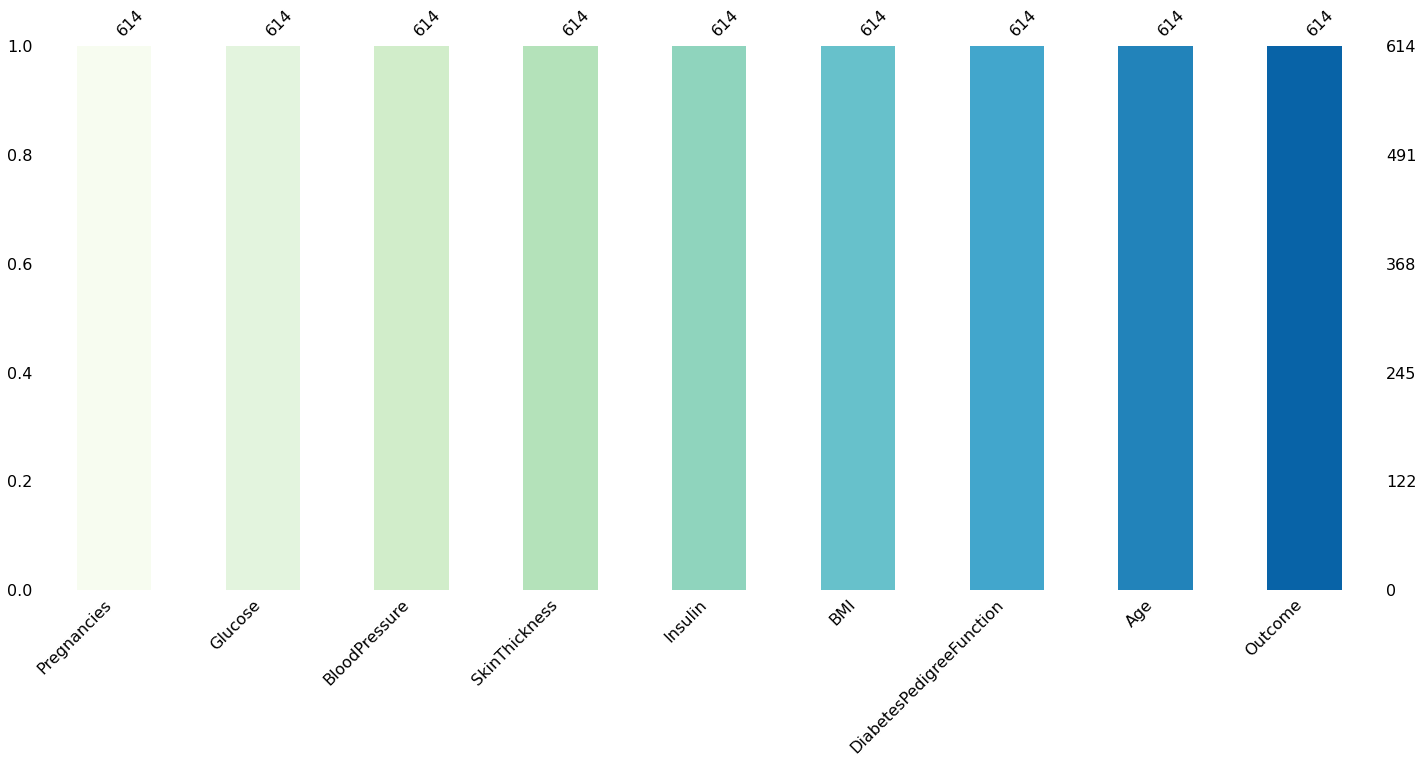

In [18]:
#Lets visualize the dataset after imputation
colors = plt.cm.GnBu(np.linspace(0, 1, 10))
msno.bar(train_df, color=colors)

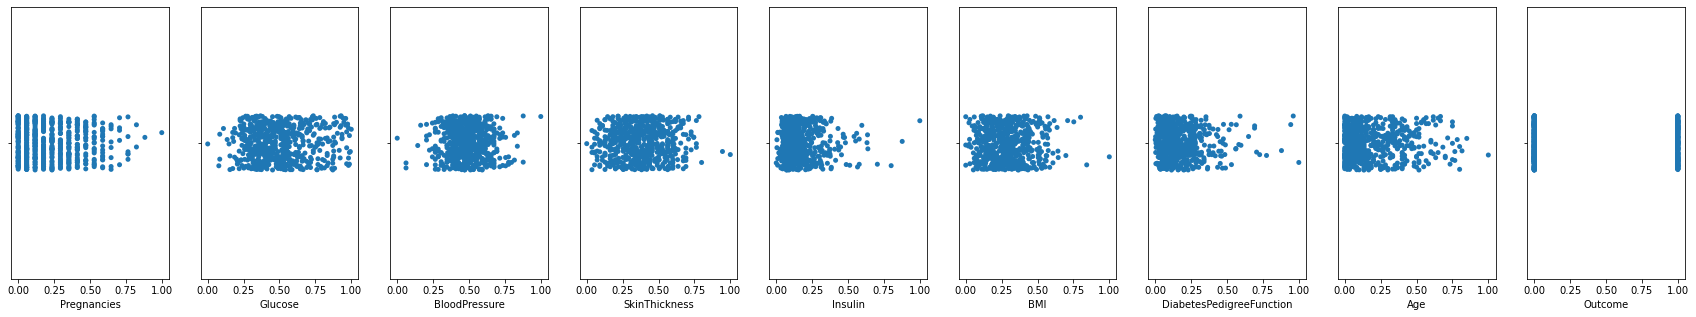

In [19]:
#Lets look at the data distribution after the imputations
numerical = train_df.select_dtypes('number').columns

plt.figure(figsize=(30,5))
for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.stripplot(data=train_df, x=col, ax=ax)

#### Lets check for data imbalance as that will cause biasnes in our 'Outcome' column

In [20]:
train_df.Outcome.value_counts()

0.0    401
1.0    213
Name: Outcome, dtype: int64

[Text(0.5, 1.0, 'Data distribution BEFORE oversampling technique')]

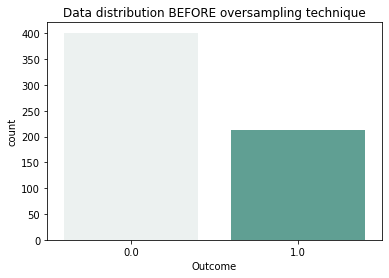

In [21]:
sns.countplot(x='Outcome', data=train_df, palette="light:#5A9").set(title='Data distribution BEFORE oversampling technique')

In [22]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(train_df.drop('Outcome', axis=1),train_df['Outcome'])
# new class distribution 
print(Counter(y_ros))

Counter({0.0: 401, 1.0: 401})


In [23]:
X_ros.shape, y_ros.shape

((802, 8), (802,))

In [24]:
ros_df = X_ros.merge(y_ros, left_index=True, right_index=True)

In [25]:
print('Dataset shape before oversampling technique:{}'.format(train_df.shape) )
print('Dataset shape after oversampling technique:{}'.format(ros_df.shape))

Dataset shape before oversampling technique:(614, 9)
Dataset shape after oversampling technique:(802, 9)


[Text(0.5, 1.0, 'Data distribution AFTER oversampling technique')]

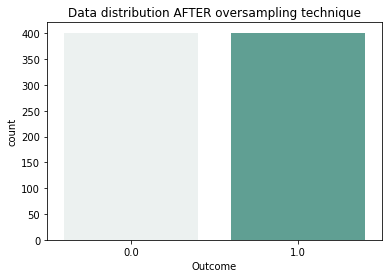

In [26]:
# creating the bar plot
sns.countplot(x='Outcome', data=ros_df, palette="light:#5A9").set(title='Data distribution AFTER oversampling technique')

#### Lets plot some scatter plots to understand the relationships between the variables.

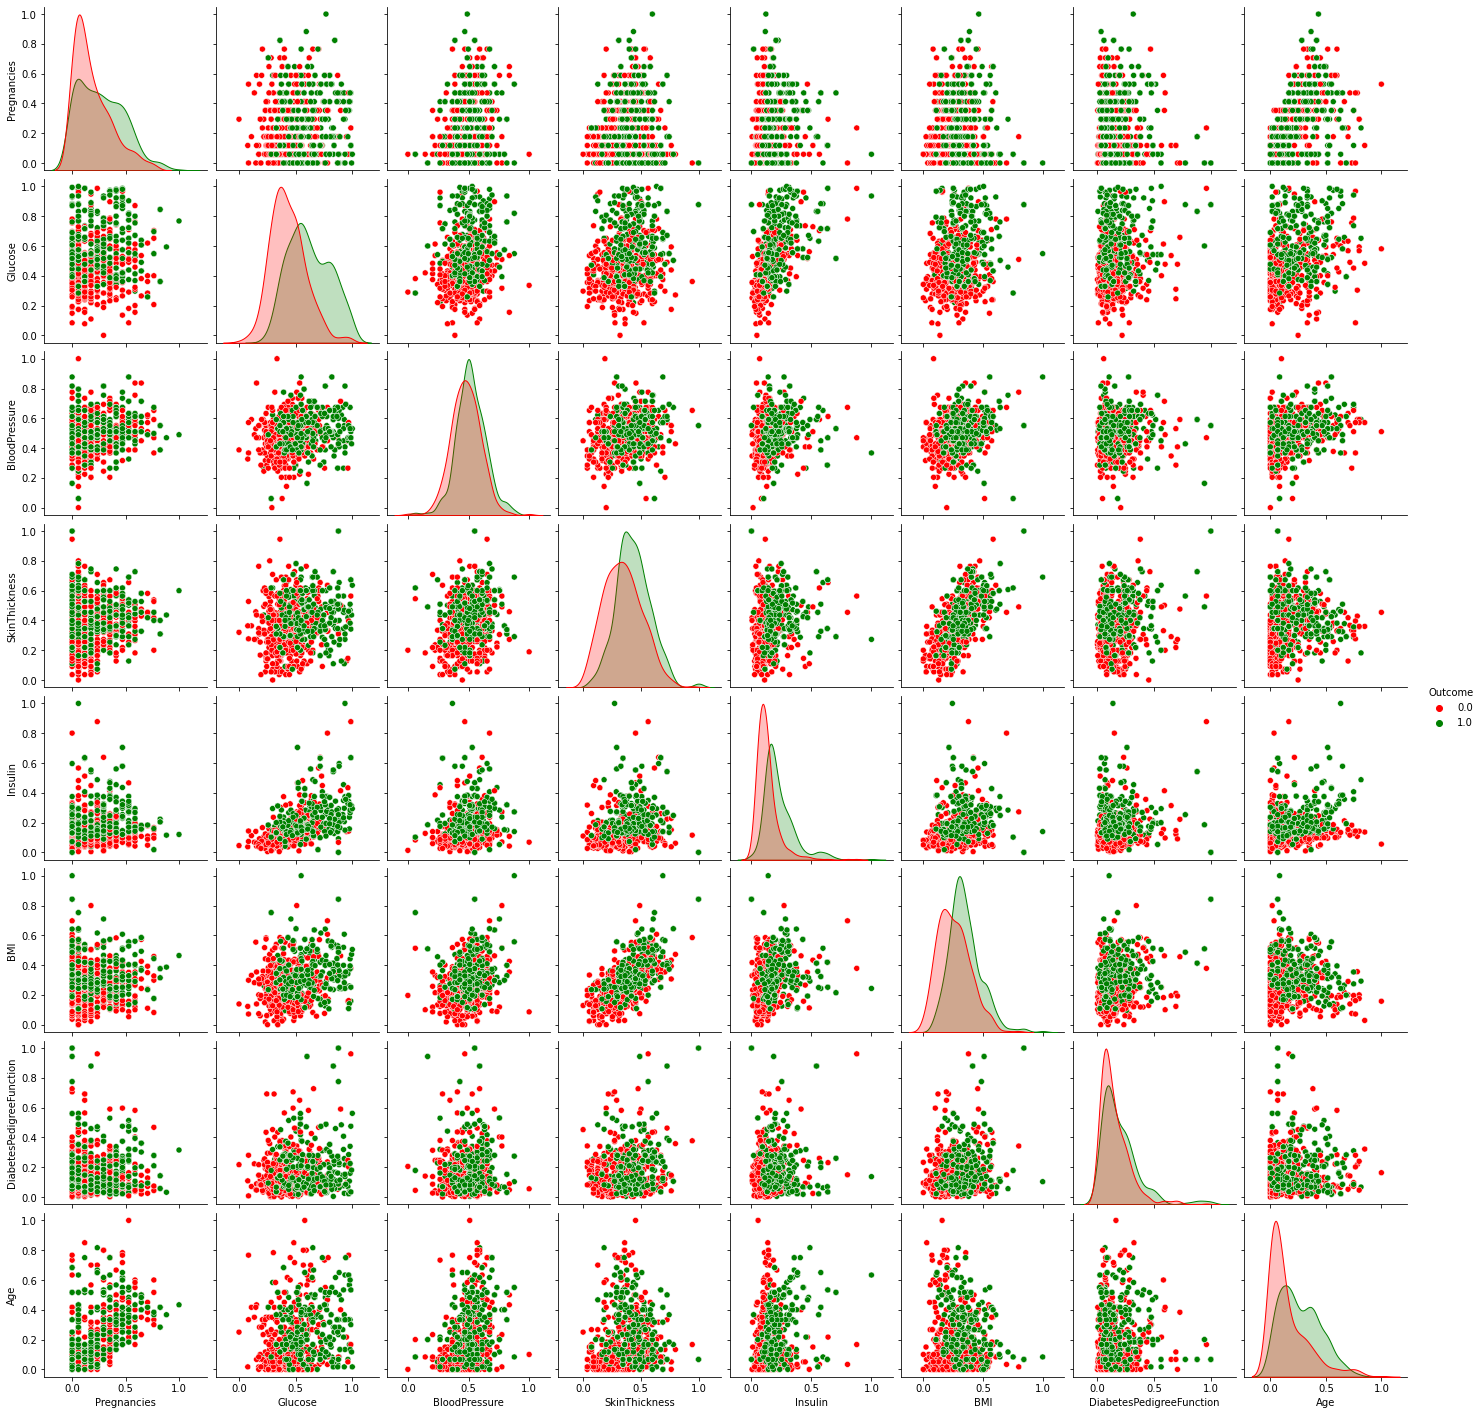

In [27]:
sns.pairplot(ros_df, hue = 'Outcome',palette=['r', 'g'])

#### Observations.
1. The main aim of pairplot is to have a general idea of how/if the features are influencing the outcome. Scatterplot helps us to find some pattern between the features. 

2. Pregnancy - There isn't any clear indication between pregnancy and other features in the dataset which highly relates to diabetic or non-diabetic conditions.

3. Glucose - There is some sort of separation but between the other features with respect to Glucose. The general trend we can see is higher insulin rate is mostly affecting the outcome to be diabetic. Again, the data is condense and overlaps.

4. Blood Pressure and other features. The datapoints are overlapping each other, can't draw a valid conclusion on one feature influencing another.Also, there are outliers which need to be investigated as well.

5. Overall, we need to further continue EDA to get a better grasp of data distributions.


<AxesSubplot:>

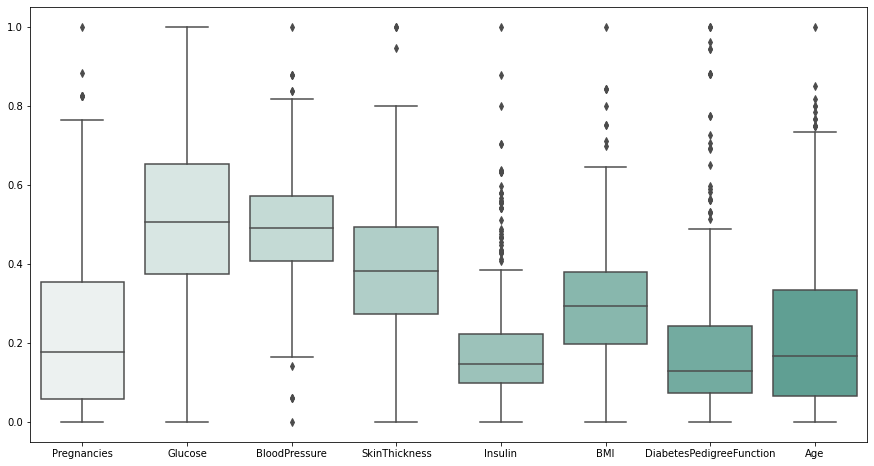

In [28]:
# Lets visualize for outliers

plt.figure(figsize=(15,8))
sns.boxplot(data=ros_df.drop("Outcome", axis=1), palette="light:#5A9")

**There are some obvious outliers. We will investigate these outliers if our model is not performing satisfactorily later on.**

In [29]:
ros_df.describe().drop('count', axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.232067,0.525713,0.498224,0.389581,0.179663,0.301386,0.175563,0.214152,0.500000
std,0.200647,0.194706,0.123729,0.163003,0.125656,0.140972,0.154753,0.189824,0.500312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.374194,0.408163,0.272727,0.099880,0.196830,0.073868,0.066667,0.000000
50%,0.176471,0.506452,0.489796,0.381818,0.147115,0.292434,0.129163,0.166667,0.500000
75%,0.352941,0.651613,0.571429,0.493636,0.221815,0.380368,0.242421,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Correlation Analysis

<AxesSubplot:>

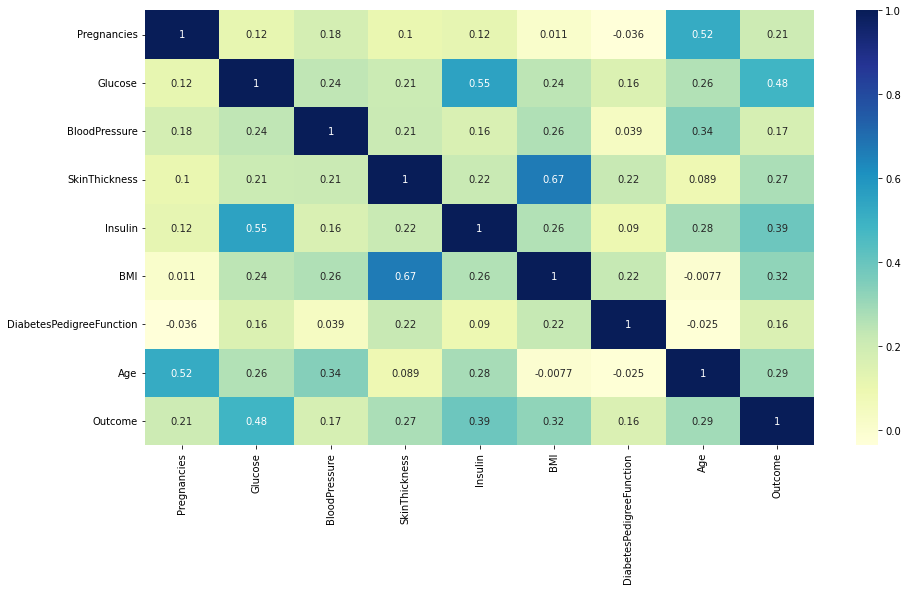

In [30]:
correlations = ros_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlations, annot=True,cmap="YlGnBu")

**Degree of correlation:**

- Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
- Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
- Low degree: When the value lies below + .29, then it is said to be a small correlation.
- No correlation: When the value is zero.

In [31]:
print(correlations["Outcome"])

Pregnancies                 0.206297
Glucose                     0.482976
BloodPressure               0.171673
SkinThickness               0.274272
Insulin                     0.389921
BMI                         0.323334
DiabetesPedigreeFunction    0.159896
Age                         0.289310
Outcome                     1.000000
Name: Outcome, dtype: float64


**Based on the degree of correlation, we can safely assume that there is some sort of correlation(ranging from low degree to high degree) between the features and outcome/target values.**

#### Splitting X_features and y_target 

In [32]:
X_features = ros_df.drop('Outcome', axis=1)
y_target = ros_df.Outcome

#Print the shapes of X_features and y_target
X_features.shape,y_target.shape

((802, 8), (802,))

#### Random Forest Classifier for feature importance

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

#create model
rf = RandomForestClassifier(n_estimators=150)

#fit the model
rf.fit(X_features, y_target)

RandomForestClassifier(n_estimators=150)

(-1.0, 5.0)

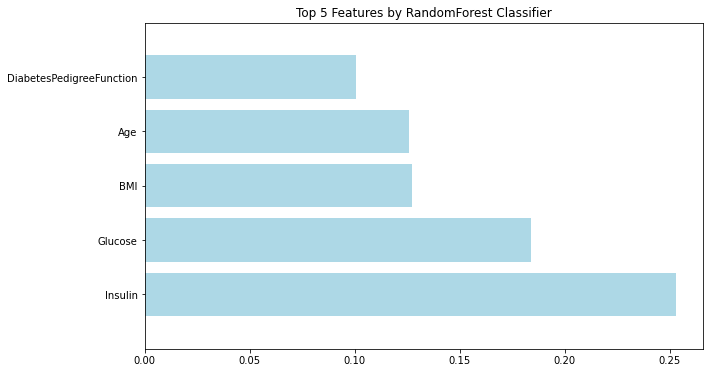

In [34]:
feat_names = X_features.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:5]

# Visualize feature importance
plt.subplots(figsize=(10,6))
plt.title("Top 5 Features by RandomForest Classifier")
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")
plt.yticks(range(len(indices)), feat_names[indices], rotation='horizontal')
plt.ylim([-1, len(indices)])

**Above, we can see the top 5 features in our dataset. However, we will not drop other features and reinvestigate this if our model is not performing satisfactorily.**

#### Split train and test

**Would Cross validation be useful in this scenario?**

Since we have a separate test set which we split in the beginning and that is not exposed thoughout the ML model development, we will no go with cross validation but the standard sklearn's train-test and split.If our model is not working satisfactorily, we would revisit this method to further enhance it**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, test_size=0.3,random_state=7)

print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(561, 8)
Shape of X_test:(241, 8)
Shape of y_train:(561,)
Shape of y_test:(241,)


#### Building ML Model

In [38]:
import warnings

# Filter out warnings from models
warnings.filterwarnings('ignore')

#### The following models are considered:
    1. KNN
    2. SVC
    3. XGBClassifier
    4. LGBMClassifier
    5. ExtraTreesClassifier
    6. RandomForestClassifier

#### KNN
**Our Base model is KNN. We will compare other models with KNN**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

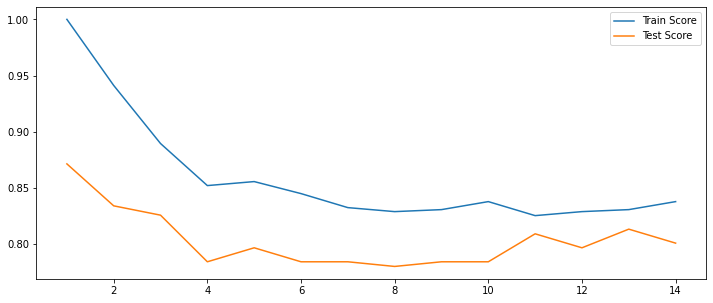

In [40]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,label='Train Score')
p = sns.lineplot(range(1,15),test_scores,label='Test Score')

In [41]:
## Lets choose n value as 6

knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [42]:
print('Score for train set with (n =13) is {}'.format(round(knn.score(X_train,y_train),5)))
print('Score for test set with (n = 13) is {}'.format(round(knn.score(X_test,y_test),5)))

Score for train set with (n =13) is 0.83066
Score for test set with (n = 13) is 0.81328


#### KNN Model Evaluation

**Confusion Matrix**

Text(0.5, 15.0, 'Predicted label')

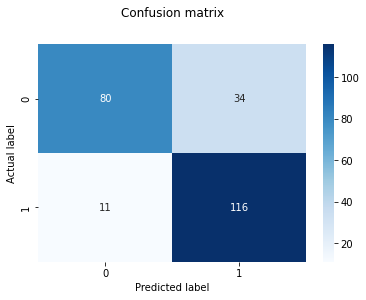

In [43]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap='Blues' ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Classification Report**

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,recall_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.70      0.78       114
         1.0       0.77      0.91      0.84       127

    accuracy                           0.81       241
   macro avg       0.83      0.81      0.81       241
weighted avg       0.82      0.81      0.81       241



**F1 Score, we will use F1_Score to evaluate and select our final model**

In [45]:
model_1 = pd.DataFrame({'Model':['KNN'],'F1_Score' :[round(f1_score(y_test,y_pred),5)], 'Recall_Score': [round(recall_score(y_test,y_pred),5)]})
model_1

,Model,F1_Score,Recall_Score
0,KNN,0.83755,0.91339


**ROC AUC**

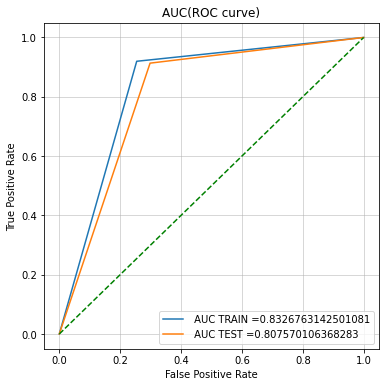

In [46]:
from sklearn.metrics import roc_curve, auc

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# calculate ROC curve
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


# plot ROC curve
fig = plt.figure(figsize=(6,6))
plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid( linestyle='-', linewidth=0.5)
plt.show()

#### SVC

In [47]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [48]:
print('Score for train set with is {}'.format(round(svc.score(X_train,y_train),5)))
print('Score for test set with is {}'.format(round(svc.score(X_test,y_test),5)))

Score for train set with is 0.84135
Score for test set with is 0.79668


#### SVC Model Evaluation

**Confusion Matrix**

Text(0.5, 15.0, 'Predicted label')

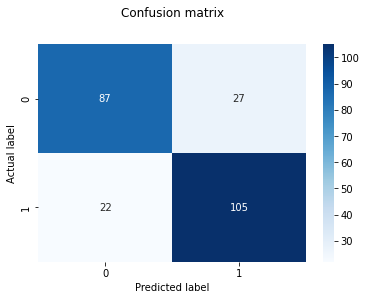

In [49]:
y_pred = svc.predict(X_test)
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Classification Report**

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       114
         1.0       0.80      0.83      0.81       127

    accuracy                           0.80       241
   macro avg       0.80      0.79      0.80       241
weighted avg       0.80      0.80      0.80       241



In [51]:
model_2 = pd.DataFrame({'Model':['SVC'],'F1_Score' :[round(f1_score(y_test,y_pred),5)],'Recall_Score': [round(recall_score(y_test,y_pred),5)]})
model_2

,Model,F1_Score,Recall_Score
0,SVC,0.81081,0.82677


**ROC AUC**

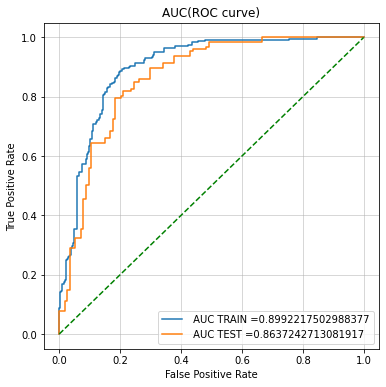

In [52]:
from sklearn.metrics import roc_curve, auc

y_train_pred = svc.decision_function(X_train)    
y_test_pred = svc.decision_function(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# plot ROC curve
fig = plt.figure(figsize=(6,6))

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid( linestyle='-', linewidth=0.5)
plt.show()

#### XGBClassifier

In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier(gamma=0)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [54]:
print('Score for train set with is {}'.format(round(xgb.score(X_train,y_train),5)))
print('Score for test set with is {}'.format(round(xgb.score(X_test,y_test),5)))

Score for train set with is 1.0
Score for test set with is 0.84647


#### XGB Model Evaluation

**Confusion Matrix**

Text(0.5, 15.0, 'Predicted label')

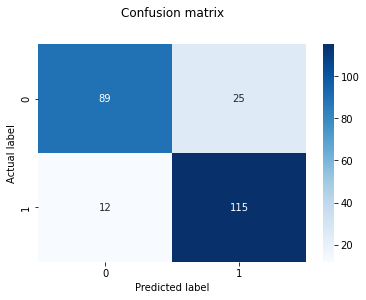

In [55]:
y_pred = xgb.predict(X_test)
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Classification Report**

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83       114
         1.0       0.82      0.91      0.86       127

    accuracy                           0.85       241
   macro avg       0.85      0.84      0.84       241
weighted avg       0.85      0.85      0.85       241



**F1_Score of the model**

In [57]:
model_3 = pd.DataFrame({'Model':['XGB'],'F1_Score' :[round(f1_score(y_test,y_pred),5)],'Recall_Score': [round(recall_score(y_test,y_pred),5)]})
model_3

,Model,F1_Score,Recall_Score
0,XGB,0.86142,0.90551


**ROC AUC**

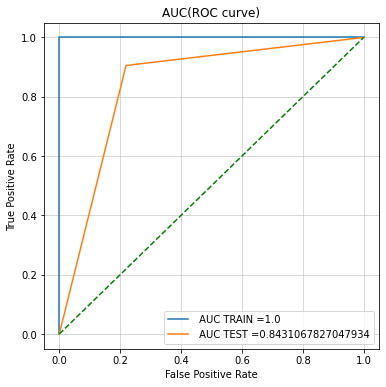

In [58]:
from sklearn.metrics import roc_curve, auc

y_train_pred = xgb.predict(X_train)    
y_test_pred = xgb.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# plot ROC curve
fig = plt.figure(figsize=(6,6))

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid( linestyle='-', linewidth=0.5)
plt.show()

#### LGBMClassifier

In [59]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier()

In [60]:
print('Score for train set with is {}'.format(round(lgb.score(X_train,y_train),5)))
print('Score for test set with is {}'.format(round(lgb.score(X_test,y_test),5)))

Score for train set with is 1.0
Score for test set with is 0.85062


#### LGBM Model Evaluation

**Confusion Matrix**

Text(0.5, 15.0, 'Predicted label')

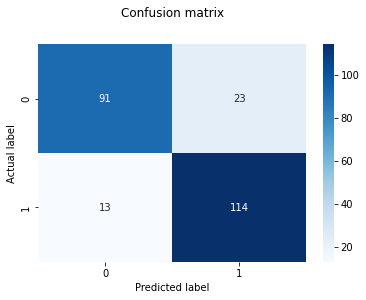

In [61]:
y_pred = lgb.predict(X_test)
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Classification Report**

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.80      0.83       114
         1.0       0.83      0.90      0.86       127

    accuracy                           0.85       241
   macro avg       0.85      0.85      0.85       241
weighted avg       0.85      0.85      0.85       241



**F1_Score of the model**

In [63]:
model_4 = pd.DataFrame({'Model':['LGB'],'F1_Score' :[round(f1_score(y_test,y_pred),5)],'Recall_Score': [round(recall_score(y_test,y_pred),5)]})
model_4

,Model,F1_Score,Recall_Score
0,LGB,0.86364,0.89764


**ROC AUC**

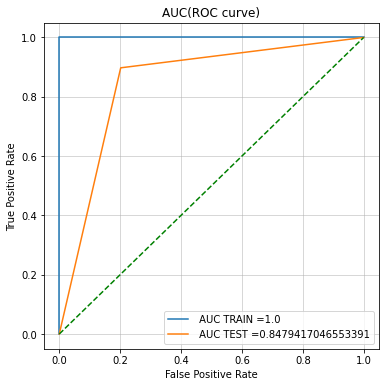

In [64]:
from sklearn.metrics import roc_curve, auc

y_train_pred = lgb.predict(X_train)    
y_test_pred = lgb.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# plot ROC curve
fig = plt.figure(figsize=(6,6))

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid( linestyle='-', linewidth=0.5)
plt.show()

#### Random Forest 

In [65]:
# Based on out TPOT analysis, RFC was chosen to have the best score, we will include all the parameters mentioned in the analysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_approximation import RBFSampler

rfc = RandomForestClassifier(criterion='gini', max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=7, n_estimators=100)
rfc.fit(X_train, y_train)
#RandomForestClassifier(RBFSampler(input_matrix, gamma=0.35000000000000003), bootstrap=False, criterion=entropy, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=100)

RandomForestClassifier(max_features=0.35000000000000003, min_samples_split=7)

In [66]:
print('Score for train set with is {}'.format(round(rfc.score(X_train,y_train),5)))
print('Score for test set with is {}'.format(round(rfc.score(X_test,y_test),5)))

Score for train set with is 0.99109
Score for test set with is 0.87967


#### RFC Model Evaluation

**Confusion Matrix**

Text(0.5, 15.0, 'Predicted label')

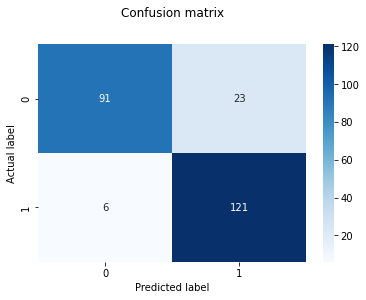

In [67]:
y_pred = rfc.predict(X_test)
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Classification Report**

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86       114
         1.0       0.84      0.95      0.89       127

    accuracy                           0.88       241
   macro avg       0.89      0.88      0.88       241
weighted avg       0.89      0.88      0.88       241



**F1_Score**

In [69]:
model_5 = pd.DataFrame({'Model':['RFC'],'F1_Score' :[round(f1_score(y_test,y_pred),5)],'Recall_Score': [round(recall_score(y_test,y_pred),5)]})
model_5

,Model,F1_Score,Recall_Score
0,RFC,0.89299,0.95276


**ROC AUC**

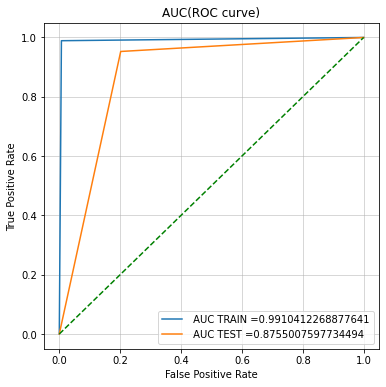

In [70]:
from sklearn.metrics import roc_curve, auc

y_train_pred = rfc.predict(X_train)    
y_test_pred = rfc.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# plot ROC curve
fig = plt.figure(figsize=(6,6))

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid( linestyle='-', linewidth=0.5)
plt.show()

#### ExtraTreesClassifier

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
extc = ExtraTreesClassifier(n_estimators=100, random_state=0)
extc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [72]:
print('Score for train set with is {}'.format(round(extc.score(X_train,y_train),5)))
print('Score for test set with is {}'.format(round(extc.score(X_test,y_test),5)))

Score for train set with is 1.0
Score for test set with is 0.88797


Text(0.5, 15.0, 'Predicted label')

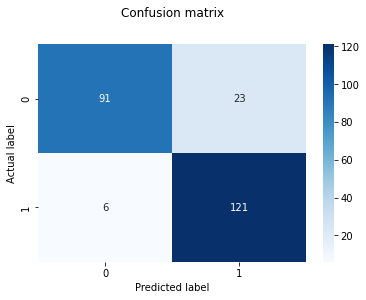

In [73]:
y_pred = rfc.predict(X_test)
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Classification Report**

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86       114
         1.0       0.84      0.95      0.89       127

    accuracy                           0.88       241
   macro avg       0.89      0.88      0.88       241
weighted avg       0.89      0.88      0.88       241



**F1_Score**

In [75]:
model_6 = pd.DataFrame({'Model':['EXTC'],'F1_Score' :[round(f1_score(y_test,y_pred),5)],'Recall_Score': [round(recall_score(y_test,y_pred),5)]})
model_6

,Model,F1_Score,Recall_Score
0,EXTC,0.89299,0.95276


**ROC AUC**

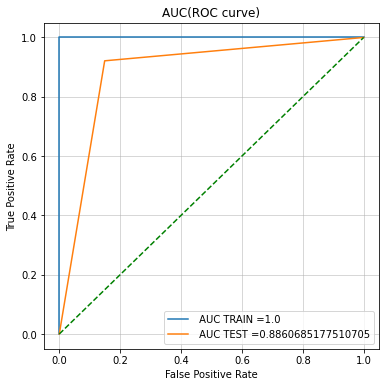

In [76]:
from sklearn.metrics import roc_curve, auc

y_train_pred = extc.predict(X_train)    
y_test_pred = extc.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# plot ROC curve
fig = plt.figure(figsize=(6,6))

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid( linestyle='-', linewidth=0.5)
plt.show()

In [77]:
column_names = ["Model", "Train_Score", "Test_Score"]
model_score = pd.DataFrame(columns=column_names)

model_score=model_score.append({'Model' : 'KNN', 'Train_Score' : round(knn.score(X_train,y_train),5), 'Test_Score' : round(knn.score(X_test,y_test),5)},
        ignore_index = True)
model_score=model_score.append({'Model' : 'SVC', 'Train_Score' : round(svc.score(X_train,y_train),5), 'Test_Score' : round(svc.score(X_test,y_test),5)},
        ignore_index = True)  
model_score=model_score.append({'Model' : 'XGB', 'Train_Score' : round(xgb.score(X_train,y_train),5), 'Test_Score' : round(xgb.score(X_test,y_test),5)},
        ignore_index = True) 
model_score=model_score.append({'Model' : 'LGB', 'Train_Score' : round(lgb.score(X_train,y_train),5), 'Test_Score' : round(lgb.score(X_test,y_test),5)},
        ignore_index = True) 
model_score=model_score.append({'Model' : 'RFC', 'Train_Score' : round(rfc.score(X_train,y_train),5), 'Test_Score' : round(rfc.score(X_test,y_test),5)},
        ignore_index = True) 
model_score=model_score.append({'Model' : 'EXTC', 'Train_Score' : round(extc.score(X_train,y_train),5), 'Test_Score' : round(extc.score(X_test,y_test),5)},
        ignore_index = True) 

#model_score.style.background_gradient(subset=["Train_Score","Test_Score"], cmap="Blues")
model_score

,Model,Train_Score,Test_Score
0,KNN,0.83066,0.81328
1,SVC,0.84135,0.79668
2,XGB,1.00000,0.84647
3,LGB,1.00000,0.85062
4,RFC,0.99109,0.87967
5,EXTC,1.00000,0.88797


**In order to choose the best model, we will use the F1 score to compare them**

In [78]:
c_names = ["Model", "F1_Score","Recall_Score"]
F1_score = pd.DataFrame(columns=c_names)

F1_score=F1_score.append(model_1,ignore_index = True)
F1_score=F1_score.append(model_2,ignore_index = True)
F1_score=F1_score.append(model_3,ignore_index = True)
F1_score=F1_score.append(model_4,ignore_index = True)
F1_score=F1_score.append(model_5,ignore_index = True)
F1_score=F1_score.append(model_6,ignore_index = True)
F1_score

,Model,F1_Score,Recall_Score
0,KNN,0.83755,0.91339
1,SVC,0.81081,0.82677
2,XGB,0.86142,0.90551
3,LGB,0.86364,0.89764
4,RFC,0.89299,0.95276
5,EXTC,0.89299,0.95276


Text(0, 0.5, 'Scores')

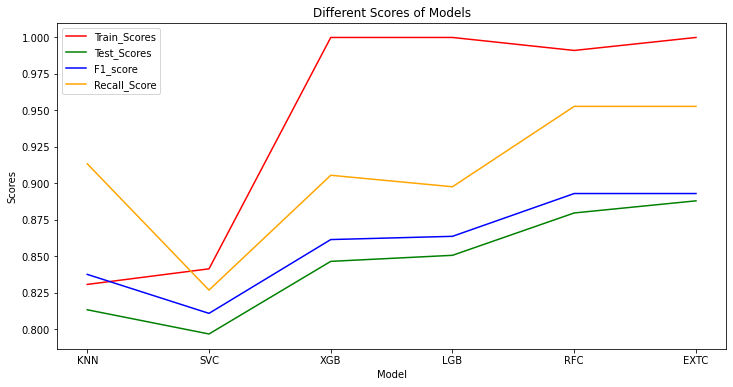

In [79]:
# The below graph will give a clearer pic

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = model_score, x=model_score.Model, y=model_score.Train_Score, sort = False,ax=ax1, color='red')
sns.lineplot(data = model_score, x=model_score.Model, y=model_score.Test_Score, sort = False, ax=ax1, color='green')
sns.lineplot(data = F1_score, x=F1_score.Model, y=F1_score.F1_Score, sort = False,ax=ax1, color='blue')
sns.lineplot(data = F1_score, x=F1_score.Model, y=F1_score.Recall_Score, sort = False, ax=ax1, color='orange')
ax1.legend(['Train_Scores', 'Test_Scores','F1_score','Recall_Score'])
plt.title('Different Scores of Models')
plt.ylabel('Scores')


**Observations**

1.RFC and EXTC have the highest score recall_scores.

2.Out of 114 of '0' class, 91 instances were correctly predicted '0', 23 instances were predicted incorrectly(FN). Out of 127 of '1' class, 121 instances were correctly predicted, 6 instances were incorrectly predicted incorrectly(FP). In our case, FP isnt as bad as FN because if left untreated , the disease could esclate into something more severe. Our aim is should be on reducing FNs.
Recall = TP/TP+FN
(If FN is lower, our Recall score will be higher)

#### Lets build a pipeline to clean the test_df set

In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 668 to 462
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               154 non-null    int64  
 1   Glucose                   154 non-null    int64  
 2   BloodPressure             154 non-null    int64  
 3   SkinThickness             154 non-null    int64  
 4   Insulin                   154 non-null    int64  
 5   BMI                       154 non-null    float64
 6   DiabetesPedigreeFunction  154 non-null    float64
 7   Age                       154 non-null    int64  
 8   Outcome                   154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 12.0 KB


In [81]:
# Lets build a pipeline to clean the test_df set
from sklearn import preprocessing

def replacing_0s(df, column_name):
    for col in column_name:        
        df[col].replace(0,np.NaN)
        return df

def normalization(df):      
        scaler = preprocessing.MinMaxScaler()
        df = pd.DataFrame(scaler.fit_transform(df))
        return df

def KNN_imputations(df):
        imputer = KNNImputer(n_neighbors=5)
        df = pd.DataFrame(imputer.fit_transform(df), columns=test_df.columns)
        return df

In [82]:
df = test_df.copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49,1
534,1,77,56,30,56,33.3,1.251,24,0
344,8,95,72,0,0,36.8,0.485,57,0
296,2,146,70,38,360,28.0,0.337,29,1


In [83]:
df_processed = (df.
              pipe(replacing_0s,['Glucose','BloodPressure','SkinThickness','Insulin','BMI']).
              pipe(normalization).
              pipe(KNN_imputations) 
               )

In [87]:
#### Predicting on test dataset
final_testdf = df_processed.drop('Outcome', axis=1)
test_prediction = extc.predict(final_testdf)
test_prediction

array([1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0.])

In [88]:
df_predicted = pd.DataFrame(test_prediction, columns = ['Predicted_values'])
df_predicted

,Predicted_values
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
149,1.0
150,0.0
151,0.0
152,1.0


In [89]:
df_processed.reset_index(drop=True, inplace=True)
df_predicted.reset_index(drop=True, inplace=True)
df_all = pd.concat([df_processed, df_predicted], axis=1)
df_all.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted_values
0,0.461538,0.266667,0.508772,0.333333,0.328152,0.639098,0.254658,0.478261,0.0,1.0
1,0.153846,0.370370,0.657895,0.323232,0.000000,0.671053,0.035714,0.000000,0.0,0.0
2,0.153846,0.340741,0.561404,0.000000,0.000000,0.578947,0.043478,0.000000,0.0,0.0
3,0.615385,0.333333,0.701754,0.000000,0.000000,0.462406,0.585404,0.282609,0.0,0.0
4,0.538462,0.548148,0.789474,0.000000,0.000000,0.562030,0.083851,0.630435,0.0,0.0


In [ ]:
df_processed_train = (cleaned_traindf.
              pipe(Label_encoder).
              pipe(Simple_imputer)
               )

In [ ]:
#Splitting X_features and y_target

X_features =df_processed_train.drop('TARGET', axis=1)
y_target = df_processed_train.TARGET

#Print the shapes of X_features and y_target

X_features.shape,y_target.shape

In [ ]:
# Splitting of training set

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.20, random_state=42) 

In [ ]:
# Standardization of training set

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  